## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
# Import required python libraries.
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# Reading our data into dataframe.
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
#Number of rows in the dataset.
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
#Number of unique users in the dataset.
df["user_id"].nunique()

290584

d. The proportion of users converted.

In [5]:
#Proportion of users converted.
obs_converted_rate = df.query("converted == 1")["user_id"].nunique()/ \
    df["user_id"].nunique()
print('Proportion of users converted:', obs_converted_rate)

Proportion of users converted: 0.12104245244060237


e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
#Number of times the new_page and treatment don't match
mismatch_count = df.query("group == 'control' \
         and landing_page == 'new_page' \
         or group == 'treatment' \
         and landing_page == 'old_page'"
        ).shape[0]
print('Number of times the new_page and treatment don\'t match:', mismatch_count)

Number of times the new_page and treatment don't match: 3893


f. Do any of the rows have missing values?

In [7]:
#Do any rows have missing values
is_missing_values = df.isnull().values.any()
print('Do any rows have missing values:', is_missing_values)

Do any rows have missing values: False


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# Drop the rows where there is no alignment on group and landing_page columns.
df2 = df.drop(df[((df.group == 'control') & (df.landing_page == 'new_page')) | ((df.group == 'treatment') & (df.landing_page == 'old_page'))].index).reset_index()

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
# Number of unique users
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
# Finding duplicated user
duplicated_user_id = df2[df2.duplicated("user_id")] \
                        .user_id.to_string(index=False)
print('Duplicate user id:', duplicated_user_id)

Duplicate user id:  773192


c. What is the row information for the repeat **user_id**? 

In [12]:
df2[df2.user_id == 773192]

,index,user_id,timestamp,group,landing_page,converted
1876,1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2862,2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
#Removing duplicated user.
df2.drop(df2[df2.duplicated("user_id")].index, inplace=True)
df2.reset_index(drop=True, inplace=True)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
#Probability of individual converting regardless of the page they receive
prob_converted =  df2.query("converted == 1")['user_id'].nunique() \
                  /df2["user_id"].nunique()
    
print('Probability of individual converted regardless of page:', prob_converted)

Probability of individual converted regardless of page: 0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
#Probability of control group individuals who converted.
cntrlgrp_converted_prob = df2.query("group == 'control' and  converted == 1")['user_id'].nunique() \
                          /df2.query("group == 'control'")['user_id'].nunique()
print('Probability of control group individuals who converted:',cntrlgrp_converted_prob)

Probability of control group individuals who converted: 0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
#Probability of treatment group individuals who converted.
trmtgrp_converted_prob = df2.query("group == 'treatment' and  converted == 1")['user_id'].nunique() \
                        /df2.query("group == 'treatment'")['user_id'].nunique()
print('Probability of treatment group individuals who converted:', trmtgrp_converted_prob)

Probability of treatment group individuals who converted: 0.11880806551510564


d. What is the probability that an individual received the new page?

In [17]:
#Probability that an individual received new page
newpage_prob = df2.query("landing_page == 'new_page'")['user_id'].nunique() \
                /df["user_id"].nunique()
print('Probability that an individual received new page:', newpage_prob)

Probability that an individual received new page: 0.5000619442226688


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Your answer goes here.**

The following observations suggest that there is **NO** sufficient evidence to say the new treatment page leads to more conversion.

- The data suggests that the probability of converting in control group was 12% , while the treatment group was at 11%.

- 50% of individuals in treatment group receiving new page. Which suggests that both control and treatment group were equally shown their respective pages.

<br>
<br>
For us to support this observation, it requires a quantifying answers to questions about samples of data.
<br>
<br>
Using statistical methods such as ** Hypothesis testing ** where we investigate a hypothesis. The result of this test allows us to interpert whether our assupmtion holds or whether the assumption has been violated.
<br>
<br>

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

Setting up null and alternative hypotheses:

**$H_{0}$** : **$p_{new}$** $\leq$ **$p_{old}$**

**$H_{1}$** : **$p_{new}$** $\gt$ **$p_{old}$**

<!--
**$H_{0}$** : **$p_{new}$** - **$p_{old}$** $\leq$ 0

**$H_{1}$** : **$p_{new}$** - **$p_{old}$** $\gt$ 0
-->


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [18]:
#pnew under null.
pnew = df2.query("converted == 1").user_id.nunique() /df2.user_id.nunique()
print('Conversion rate under the null hypothesis (Pnew):',pnew)

Conversion rate under the null hypothesis (Pnew): 0.11959708724499628


$p_{new}$ = 0.1196

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [19]:
#We assume under the null hypothesis, both Pnew and Pold have equal success rate.
pold = pnew
print('Conversion rate under the null hypothesis (Pold):',pold)

Conversion rate under the null hypothesis (Pold): 0.11959708724499628


$p_{old}$ = 0.1196

c. What is $n_{new}$?

In [20]:
#Number of individuals in the treatment group.
nnew = df2.query("group == 'treatment'")['converted'].shape[0]
print('Number of individuals in the treatment group:', nnew)

Number of individuals in the treatment group: 145310


d. What is $n_{old}$?

In [21]:
#Number of individuals in the control group
nold = df2.query("group == 'control'")['converted'].shape[0]
print('Number of individuals in the control group',nold)

Number of individuals in the control group 145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
# Using numpy to simulate nnew transactions of 0, 1s.
new_page_converted = np.random.choice([0,1] , nnew, [1-pnew, pnew])
new_page_converted

array([0, 1, 1, ..., 1, 0, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
# Using numpy to simulate nold transactions of 0, 1s.
old_page_converted = np.random.choice([0,1] , nold, [1-pold, pold])
old_page_converted

array([0, 0, 0, ..., 1, 0, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
# Difference in mean of treatment vs control page.
baseline_converted = new_page_converted.mean() - old_page_converted.mean()
print(baseline_converted)

0.00031678628440473533


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [25]:
# Simulate 10,000 values.
p_diffs = []

for _ in range(10000):
    new_page_con = np.random.choice([0,1] , nnew, [1-pnew, pnew])
    old_page_con = np.random.choice([0,1] , nold, [1-pold, pold])
    diff_con = new_page_con.mean() - old_page_con.mean()
    p_diffs.append(diff_con)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

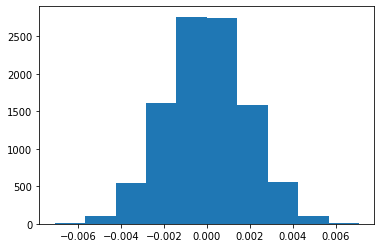

In [26]:
# Histogram of difference in mean distribution. 
diffs = np.array(p_diffs)
plt.hist(diffs);

In [27]:
# Lets get the actual difference.
actual_diff = df2.query('group == "treatment"')['converted'].mean() - df2.query('group == "control"')['converted'].mean()
actual_diff

-0.0015782389853555567

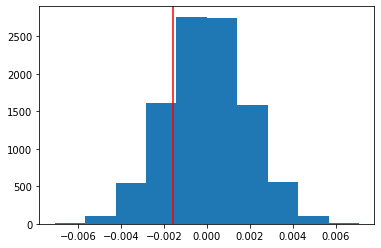

In [28]:
# Histogram plot with actual difference as show with horizontal line.
plt.hist(diffs)
plt.axvline(actual_diff, color='r');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [29]:
# Calculate the p value. Based on our alternate hypothesis, we calculate the proportion of the simulated 
p_val = (diffs > actual_diff).mean()
p_val

0.7993

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

The value calculated is called as p-value. The p-value is the probability of getting our statistic or a more extreme value if the null is true.

When the p-value is large, we have evidence that our statistic was likely to come from the null hypothesis. Therefore, we do not have evidence to reject the null.

By comparing our p-value of ** 0.7993 ** to our type I error threshold $\alpha$, of ** 5% ** we make our decision that we ** fail to reject the null hypothesis. **

There is no sufficient evidence to say that the new treatment page leads to more conversions.



l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [30]:
# Importing statsmodel, initilizing base values.
import statsmodels.api as sm

convert_old = df2.query("converted == 1 and landing_page == 'old_page'").shape[0]
convert_new = df2.query("converted == 1 and landing_page == 'new_page'").shape[0]
n_old = df2.query("landing_page == 'old_page'").shape[0]
n_new = df2.query("landing_page == 'new_page'").shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [31]:
# Building ztest - Z-tests are statistical calculations that can be used to compare population means to a sample's.
n = n_old + n_new
pnull = obs_converted_rate
phat = pnew

significance = 0.05


stat, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], pnull, alternative='larger')

print('z_stat: %0.3f, p_value: %0.3f' % (stat, p_value))


if p_value > significance:
   print ("Fail to reject the null hypothesis - suggesting that our statistic came from null.")
else:
   print ("Reject the null hypothesis - suggest the alternative hypothesis is true.")


z_stat: -99.230, p_value: 1.000
Fail to reject the null hypothesis - suggesting that our statistic came from null.


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The ztest using statsmodel resulted in a p value of 1.

With a p value of 1, which is large then our type I error threshold $\alpha$, of ** 5% ** we make our decision that we ** fail to reject the null hypothesis. **

In other words, the treatment page (new page) is statistically no different and nor better than the old page. We would expect their long-term performance to be similar to one another. The conclusion is the same as the findings in parts j. and k.

There is no sufficient evidence to say that the new treatment page leads to more conversions.


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

We will be using Logistic Regression. Logistic Regression enable us to predict binary response value. In this context, it is used to predict whether or not an individual converts.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [32]:
# Revist the dataframe columns.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290584 entries, 0 to 290583
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   index         290584 non-null  int64 
 1   user_id       290584 non-null  int64 
 2   timestamp     290584 non-null  object
 3   group         290584 non-null  object
 4   landing_page  290584 non-null  object
 5   converted     290584 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 13.3+ MB


In [33]:
# Create intercept and ab_page column as specified.
df2['intercept'] = 1
df2[['drop', 'ab_page']] = pd.get_dummies(df2['group'])
df2.drop('drop', axis=1, inplace=True)
df2.head()

,index,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [34]:
# Create statsmodel regression model.
logit = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [35]:
# Get the result summary.
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 28 Sep 2020   Pseudo R-squ.:               8.077e-06
Time:                        22:23:11   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?


The p-value associated with ab_page is 0.190. The stats model Logit uses a two-tailed test for the params. While the p-value obtained in part II was using a one-tailed p value.

The null and alternate hypothesis for PART III 

**$H_{0}$** : **$p_{new}$** = **$p_{old}$**

**$H_{1}$** : **$p_{new}$** $\neq$ **$p_{old}$**

While the null and alternate hypothesis for PART II

**$H_{0}$** : **$p_{new}$** $\leq$ **$p_{old}$**

**$H_{1}$** : **$p_{new}$** $\gt$ **$p_{old}$**


The p-value from part III 0.190 is greater than error threshold $\alpha$, of ** 5% ** we make our decision that we ** reject null hypothesis. ** We have significant evidence that conversion rates of treatment and control pages are not equal.


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Significant bivariate relationships are not always significant in multiple regression. The advantages of considering other factors into the regression model is that we would be able to find out other factors that may influence why a person converts or does not convert. By considering other factors helps us determine the cause of converts that could be beyond the new page versus the old page. This new factors provides further insight as to whether the new page really affects or doesn't affect the conversion rate.

Multicollinearity is one of the disadvantage if addding additonal terms into a regression model. We would like x-variables to be related to the response, but not to be related to one another. Our hypothesis testing results may not be reliable. It turns out that having correlated explanatory variables means that our coefficient estimates are less stable. A particular variable might be useful for predicting the response, but because of the relationship it has with other x-variables, you will no longer see this association.


g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [36]:
# Read the countries dataframe to join it with original dataframe.
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [37]:
### Create the necessary dummy variables. We also prepare our dataset to perform Logistic Regression.
countries_dummies = pd.get_dummies(df_new['country'])
df_countries = df_new.join(countries_dummies)
df_countries = df_countries.drop(['country', 'US'], axis=1)
df_countries.head()

,index,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK
user_id,,,,,,,,,
834778,143206,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1
928468,157345,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0
822059,257177,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1
711597,48778,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1
710616,106686,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1


In [38]:
# Logistic Regression using stats model.
logit = sm.Logit(df_countries['converted'], df_countries[['intercept', 'CA', 'UK']])
results = logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Mon, 28 Sep 2020   Pseudo R-squ.:               1.521e-05
Time:                        22:24:37   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

### Fit Your Linear Model And Obtain the Results ###
The p-values for all countries are above 0.05 which signifies that they are statistically insignificant in predicting the conversion of users.

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.